# Pseucodigo
```
Importar la biblioteca matplotlib.pyplot como plt
Importar la biblioteca sympy como sym
Importar la biblioteca numpy como np

Definir un arreglo xi con los valores [1, 3, 5, 7, 13]
Definir un arreglo fi con los valores [800, 2310, 3090, 3940, 4755]

Definir una variable x como símbolo

Inicializar una variable polinomio con el valor 0
Obtener la longitud n del arreglo xi

Para i en el rango de 0 a n-1 con incremento de 1:
    Inicializar una variable numerador con el valor 1
    Inicializar una variable denominador con el valor 1

    Para j en el rango de 0 a n-1 con incremento de 1:
        Si j no es igual a i:
            Actualizar numerador multiplicándolo por (x - xi[j])
            Actualizar denominador multiplicándolo por (xi[i] - xi[j])

    Calcular L como numerador dividido por denominador
    Actualizar polinomio sumándole L multiplicado por fi[i]
```

In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np

# Datos de entrada
xi = np.array([2, 5, 6])
fi = np.array([4, 1,2])
x = sym.Symbol('x')

# Inicialización del polinomio
polinomio = 0
n = len(xi)

# Calcular los productos de diferencias divididas
for i in range(n):
    numerador = 1
    denominador = 1
    for j in range(n):
        if j != i:
            numerador *= (x - xi[j])
            print(numerador)
            denominador *= (xi[i] - xi[j])
           #  print(denominador)
    L = numerador / denominador
    polinomio += L * fi[i]

# Imprimir el polinomio resultante
print("Polinomio resultante:", polinomio)


x - 5
(x - 6)*(x - 5)
x - 2
(x - 6)*(x - 2)
x - 2
(x - 5)*(x - 2)
Polinomio resultante: (x - 6)*(x - 5)/3 - (x - 6)*(x - 2)/3 + (x - 5)*(x - 2)/2


In [2]:
l0= 1/2*((x-5)*(x-2))
l0

0.5*(x - 5)*(x - 2)

In [3]:
polisimp = polinomio.expand()
print(polisimp)

x**2/2 - 9*x/2 + 11


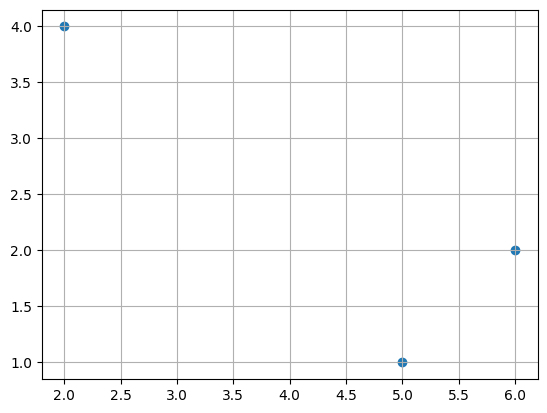

In [4]:
#grafica de los puntos
plt.figure()
plt.scatter(xi,fi)
plt.grid()
plt.show()

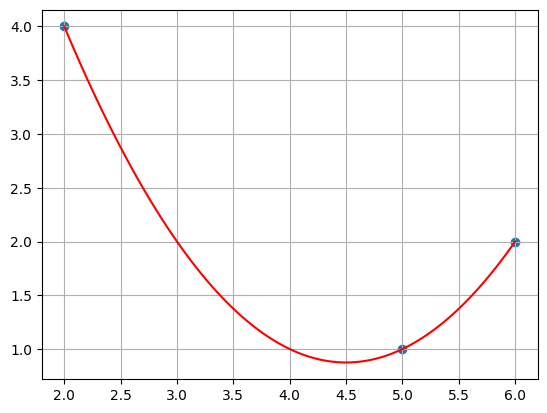

In [5]:
#grafica de polinomio
pol = sym.lambdify(x,polisimp)

a = min(xi)
b = max(xi)

pxi = np.linspace(a,b,100)
pyi = pol(pxi)
plt.figure()
plt.scatter(xi,fi)
plt.plot(pxi,pyi,color='red')
plt.grid()
plt.show()

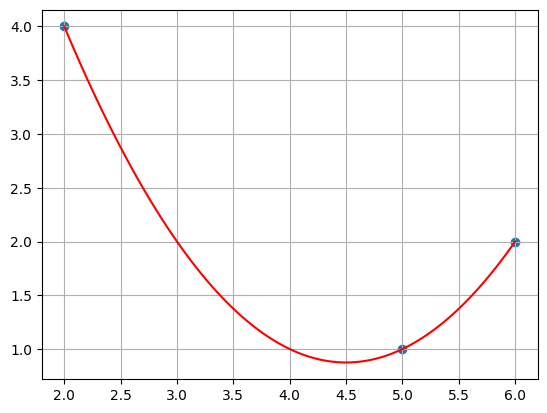

In [6]:
def interpol(xi,fi):

 x = sym.Symbol('x')

 # Inicialización del polinomio
 polinomio = 0
 n = len(xi)

 # Calcular los productos de diferencias divididas
 for i in range(n):
     numerador = 1
     denominador = 1
     for j in range(n):
         if j != i:
             numerador *= (x - xi[j])
             denominador *= (xi[i] - xi[j])
     L = numerador / denominador
     polinomio += L * fi[i]
     polisimp = polinomio.expand()

     pol = sym.lambdify(x,polisimp)

 a = min(xi)
 b = max(xi)

 pxi = np.linspace(a,b,100)
 pyi = pol(pxi)
 plt.figure()
 plt.scatter(xi,fi)
 plt.plot(pxi,pyi,color='red')
 plt.grid()
 plt.show()
 return(True)
grafica = interpol(xi,fi)

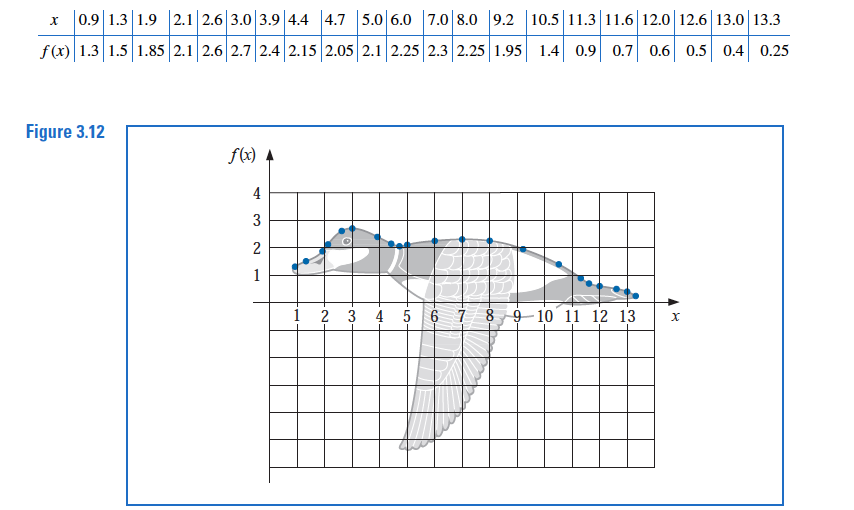Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [7]:
import numpy as np
import pandas as pd
x= np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y =np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
dicc ={"x":x,"y":y}
df = pd.DataFrame(dicc)
df.head(5)


,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60


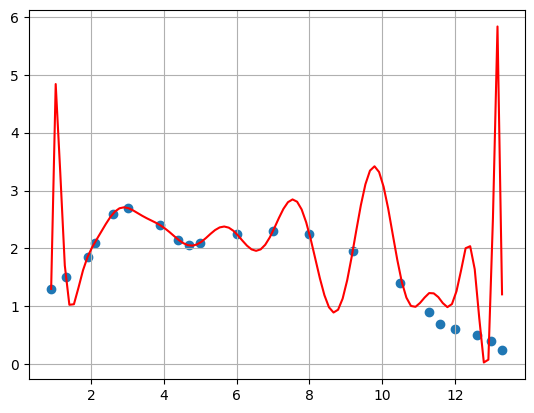

In [8]:
import matplotlib.pyplot as plt

a = df['x']
b = df['y']
grafico = interpol(a,b)

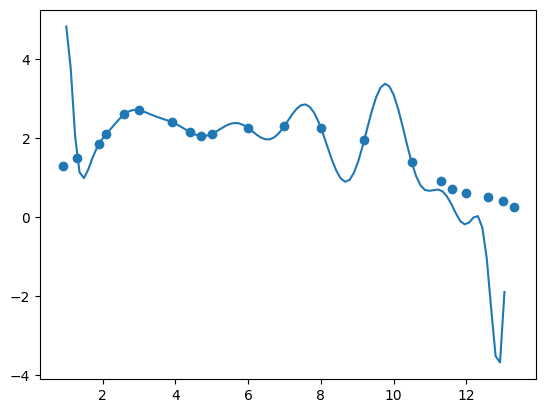

In [9]:
import scipy as sc
a = df['x']
b = df['y']
s = sc.interpolate.lagrange(a,b)
x = np.linspace(1,13.05,100)
plt.scatter(a,b)
plt.plot(x,s(x))